In [1]:
from __future__ import print_function
from __future__ import division

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context(rc={'figure.figsize': (14, 7) } )
figzize_me = figsize =(14, 7)
# import warnings; warnings.simplefilter('ignore')
import pandas as pd
pd.options.display.max_columns = 12

import os
import sys
# 使用insert 0即只使用github，避免交叉使用了pip安装的abupy，导致的版本不一致问题
sys.path.insert(0, os.path.abspath('../'))
import abupy
from abupy import xrange, range

# 打开测试数据环境，与书中的例子数据一致，使用RomDataBu下的df_kl.h5数据
abupy.env.enable_example_env_ipython()

enable example env will only read RomDataBu/csv


In [2]:
print(sys.version)

3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]


# 第4章 量化工具-Pandas

[abu量化系统github地址](https://github.com/bbfamily/abu) (您的star是我的动力！)

[abu量化文档教程ipython notebook](https://github.com/bbfamily/abu/tree/master/abupy_lecture)

## 4.1 基本操作方法

### 4.1.1 DataFrame构建及方法

In [3]:
import pandas as pd

In [4]:
stock_day_change = np.load('../gen/stock_day_change.npy')
stock_day_change.shape

(200, 504)

In [5]:
# 下面三种写法输出完全相同，输出如表4-1所示
pd.DataFrame(stock_day_change).head()
pd.DataFrame(stock_day_change).head(5)
pd.DataFrame(stock_day_change)[:5]

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,500,501,502,503
0,0.3804,0.1226,-0.2852,-0.0089,0.4573,0.1093,-0.3681,1.3237,1.6323,0.1800,...,1.4304,0.7820,1.0432,0.3477,1.0961,-0.6955,-1.5342,0.5942,1.2468,0.3439
1,0.1338,-0.4931,1.4470,-1.0349,0.4230,0.3662,0.7446,0.5568,-0.1086,0.4740,...,-0.9448,0.6333,0.2955,-1.2758,0.2412,1.0614,-0.8178,1.3208,0.7397,1.7038
2,1.4970,1.1742,0.2613,0.7038,1.3186,-0.4790,-0.0873,-0.8022,0.0928,-0.0033,...,0.0862,0.0919,1.1406,0.4591,0.8644,1.2124,0.2709,-0.7389,-0.3335,-0.3579
3,-1.5701,0.2527,1.1458,0.2931,-1.2993,0.3162,0.7483,-2.1059,0.4344,1.6260,...,-0.7098,1.0586,0.5112,0.0777,1.3667,-0.2951,-0.9575,-0.2510,-0.1414,0.7696
4,1.3072,0.2766,-0.2871,-0.1256,-0.2172,-0.0134,0.9356,-1.3075,-0.6365,-0.4070,...,0.7130,0.2662,0.3313,-1.1977,-1.2149,-0.1997,1.0993,0.3709,-0.4096,-0.0311


### 4.1.2 索引行列序列

In [6]:
# 股票0 -> 股票stock_day_change.shape[0]
stock_symbols = ['股票 ' + str(x) for x in
                 xrange(stock_day_change.shape[0])]
# 通过构造直接设置index参数，head(2)就显示两行，表4-2所示
pd.DataFrame(stock_day_change, index=stock_symbols).head(2)

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,500,501,502,503
股票 0,0.3804,0.1226,-0.2852,-0.0089,0.4573,0.1093,-0.3681,1.3237,1.6323,0.180,...,1.4304,0.7820,1.0432,0.3477,1.0961,-0.6955,-1.5342,0.5942,1.2468,0.3439
股票 1,0.1338,-0.4931,1.4470,-1.0349,0.4230,0.3662,0.7446,0.5568,-0.1086,0.474,...,-0.9448,0.6333,0.2955,-1.2758,0.2412,1.0614,-0.8178,1.3208,0.7397,1.7038


In [7]:
# 从2017-1-1向上时间递进，单位freq='1d'即1天
days = pd.date_range('2017-1-1',
                     periods=stock_day_change.shape[1], freq='1d')
# 股票0 -> 股票stock_day_change.shape[0]
stock_symbols = ['股票 ' + str(x) for x in
                 xrange(stock_day_change.shape[0])]
# 分别设置index和columns
df = pd.DataFrame(stock_day_change, index=stock_symbols, columns=days)
# 表4-3所示
df.head(2)

,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,...,2018-05-10,2018-05-11,2018-05-12,2018-05-13,2018-05-14,2018-05-15,2018-05-16,2018-05-17,2018-05-18,2018-05-19
股票 0,0.3804,0.1226,-0.2852,-0.0089,0.4573,0.1093,-0.3681,1.3237,1.6323,0.180,...,1.4304,0.7820,1.0432,0.3477,1.0961,-0.6955,-1.5342,0.5942,1.2468,0.3439
股票 1,0.1338,-0.4931,1.4470,-1.0349,0.4230,0.3662,0.7446,0.5568,-0.1086,0.474,...,-0.9448,0.6333,0.2955,-1.2758,0.2412,1.0614,-0.8178,1.3208,0.7397,1.7038


### 4.1.3 金融时间序列

In [8]:
# df做个转置
df = df.T
# 表4-4所示
df.head()

,股票 0,股票 1,股票 2,股票 3,股票 4,股票 5,股票 6,股票 7,股票 8,股票 9,...,股票 190,股票 191,股票 192,股票 193,股票 194,股票 195,股票 196,股票 197,股票 198,股票 199
2017-01-01,0.3804,0.1338,1.4970,-1.5701,1.3072,-0.8221,-1.8280,0.6795,0.6162,-1.4716,...,-1.9337,0.9363,0.0414,0.1169,-0.1846,1.2458,0.0452,-0.5585,-1.2133,-0.1847
2017-01-02,0.1226,-0.4931,1.1742,0.2527,0.2766,-1.1146,0.3413,-0.5707,2.1520,-0.8745,...,-0.5065,1.3101,2.7783,-0.2140,0.4578,0.4477,0.7101,-0.5875,0.0937,-0.4632
2017-01-03,-0.2852,1.4470,0.2613,1.1458,-0.2871,-0.7971,-0.2059,0.2990,-1.0013,1.7358,...,-1.1006,1.4992,-1.4178,-0.4185,1.2126,2.5001,0.8145,-0.1303,-0.3104,-0.9467
2017-01-04,-0.0089,-1.0349,0.7038,0.2931,-0.1256,1.9453,0.2045,0.4838,0.5760,0.5343,...,0.5491,0.8154,0.4971,0.3053,0.1993,1.6069,0.0845,0.4228,1.6296,1.1553
2017-01-05,0.4573,0.4230,1.3186,-1.2993,-0.2172,-1.6606,-1.0461,-1.9159,-0.9558,-1.0895,...,0.2852,1.0255,-0.6876,0.9872,-0.8155,0.7874,0.5427,-0.1573,1.0198,0.2514


In [9]:
# df_20 = df.resample('21D', how='mean')
from abupy import pd_resample
df_20 = pd_resample(df, '21D', how='mean')
# 表4-5所示
df_20.head()

,股票 0,股票 1,股票 2,股票 3,股票 4,股票 5,股票 6,股票 7,股票 8,股票 9,...,股票 190,股票 191,股票 192,股票 193,股票 194,股票 195,股票 196,股票 197,股票 198,股票 199
2017-01-01,0.1013,0.3678,0.0751,-0.1024,0.1413,-0.1447,-0.0268,0.1608,0.3065,0.0767,...,0.0974,0.5264,0.1222,0.0330,-0.1458,0.1969,-0.2966,-0.4553,-0.0567,0.1840
2017-01-22,-0.0590,-0.3772,0.3770,-0.0110,0.3814,0.0161,-0.0816,0.2679,0.0769,-0.2526,...,-0.2644,0.3390,0.1679,-0.6029,0.0479,-0.3020,0.2014,0.1458,0.1965,-0.0356
2017-02-12,-0.1384,-0.2440,0.0015,0.0370,-0.1836,0.3559,-0.0196,0.0122,-0.2404,-0.0592,...,0.3232,0.2164,-0.0406,0.2500,0.1010,-0.0978,0.2082,0.0540,0.0070,0.0772
2017-03-05,0.3858,-0.1027,0.2457,-0.2191,0.0853,-0.1359,-0.0880,0.3058,0.0181,0.0195,...,0.0598,-0.1272,0.0815,-0.0631,-0.2253,0.2572,0.1409,0.3716,-0.1935,-0.2654
2017-03-26,-0.0765,-0.0083,0.0382,0.1188,0.6477,-0.2570,0.0050,0.2085,0.1097,-0.2221,...,0.0891,0.1756,0.1823,0.1668,0.1136,-0.4618,0.0316,-0.1309,-0.2588,-0.1131


### 4.1.4 Series构建及方法

In [10]:
df_stock0 = df['股票 0']
# 打印df_stock0类型
print(type(df_stock0))
# 打印出Series的前5行数据, 与DataFrame一致
df_stock0.head()

<class 'pandas.core.series.Series'>


2017-01-01    0.3804
2017-01-02    0.1226
2017-01-03   -0.2852
2017-01-04   -0.0089
2017-01-05    0.4573
Freq: D, Name: 股票 0, dtype: float64

<AxesSubplot:>

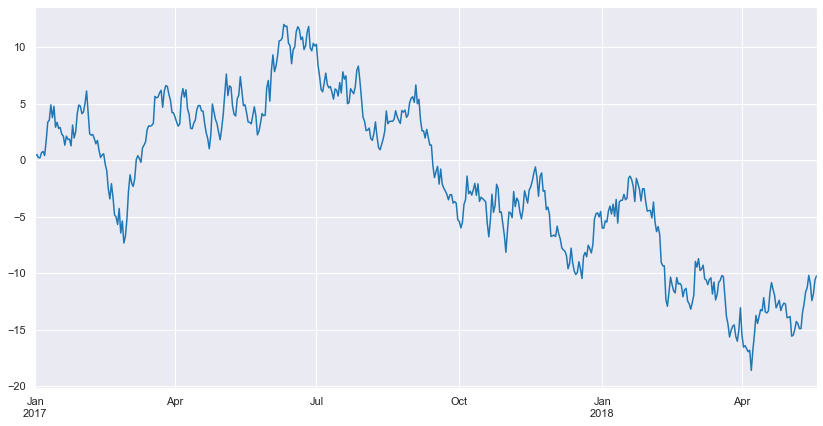

In [11]:
df_stock0.cumsum().plot()

### 4.1.5 重采样数据

In [12]:
from abupy import pd_resample
# 以5天为周期重采样（周k）
# df_stock0_5 = df_stock0.cumsum().resample('5D', how='ohlc')
df_stock0_5 = pd_resample(df_stock0.cumsum(), '5D', how='ohlc')
# 以21天为周期重采样（月k），
# df_stock0_20 = df_stock0.cumsum().resample('21D', how='ohlc')
df_stock0_20 = pd_resample(df_stock0.cumsum(), '21D', how='ohlc')
# 打印5天重采样，如下输出2017-01-01, 2017-01-06, 2017-01-11, 表4-6所示
df_stock0_5.head()

,open,high,low,close
2017-01-01,0.3804,0.6662,0.2089,0.6662
2017-01-06,0.7755,3.5434,0.4074,3.5434
2017-01-11,4.8975,4.8975,2.9178,3.3507
2017-01-16,2.8021,2.9054,1.3290,1.3290
2017-01-21,2.1272,3.1078,1.2624,3.1078


D:\0ilraypan\python_work\env\abu\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


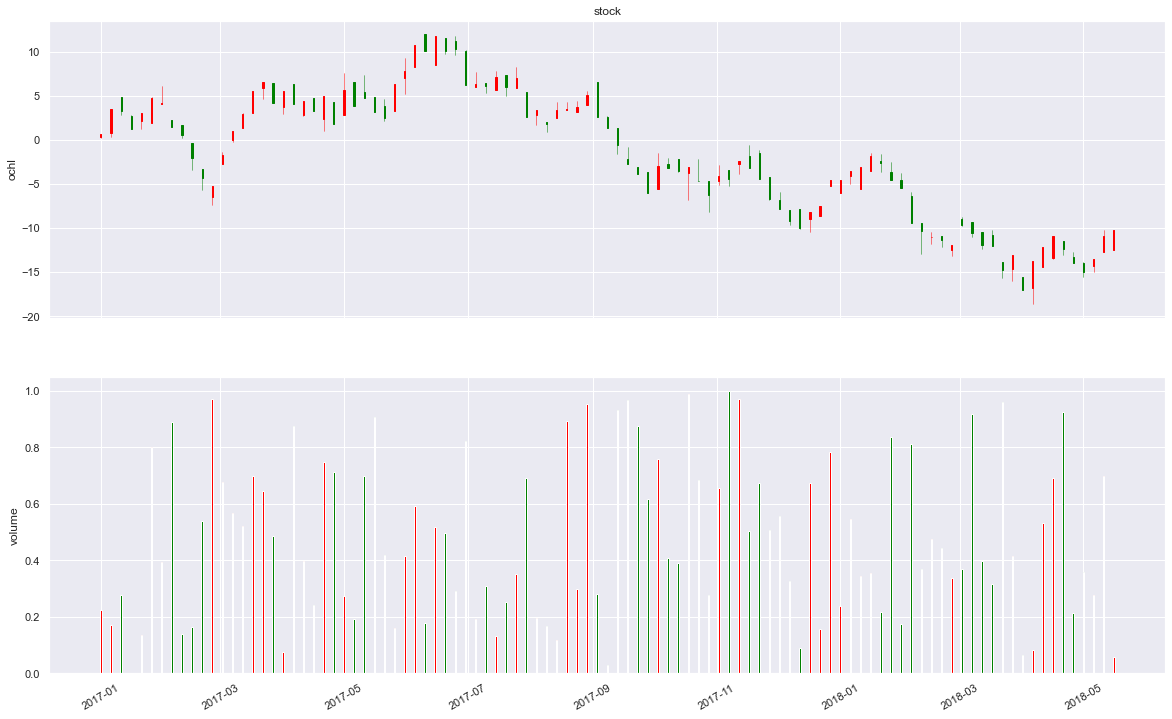

In [13]:
from abupy import ABuMarketDrawing 
# 图4-2所示
ABuMarketDrawing.plot_candle_stick(df_stock0_5.index,
                                   df_stock0_5['open'].values,
                                   df_stock0_5['high'].values,
                                   df_stock0_5['low'].values,
                                   df_stock0_5['close'].values,
                                   np.random.random(len(df_stock0_5)),
                                   None, 'stock', day_sum=False,
                                   html_bk=False, save=False)

In [14]:
print(type(df_stock0_5['open'].values))
print(df_stock0_5['open'].index)
print(df_stock0_5.columns)

<class 'numpy.ndarray'>
DatetimeIndex(['2017-01-01', '2017-01-06', '2017-01-11', '2017-01-16',
               '2017-01-21', '2017-01-26', '2017-01-31', '2017-02-05',
               '2017-02-10', '2017-02-15',
               ...
               '2018-04-01', '2018-04-06', '2018-04-11', '2018-04-16',
               '2018-04-21', '2018-04-26', '2018-05-01', '2018-05-06',
               '2018-05-11', '2018-05-16'],
              dtype='datetime64[ns]', length=101, freq='5D')
Index(['open', 'high', 'low', 'close'], dtype='object')


## 4.2 基本数据分析示例

In [15]:
from abupy import ABuSymbolPd

In [16]:
# n_folds=2两年
tsla_df = ABuSymbolPd.make_kl_df('usTSLA', n_folds=2)
# 表4-7所示
tsla_df.tail()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2016-07-20,228.36,229.800,225.00,1.38,226.47,225.26,2568498,20160720,2,499,9.1923,8.7234
2016-07-21,220.50,227.847,219.10,-3.44,226.00,228.36,4428651,20160721,3,500,9.1711,8.7251
2016-07-22,222.27,224.500,218.88,0.80,221.99,220.50,2579692,20160722,4,501,9.1858,8.7790
2016-07-25,230.01,231.390,221.37,3.48,222.27,222.27,4490683,20160725,0,502,9.2669,8.9298
2016-07-26,225.93,228.740,225.63,-1.77,227.34,230.01,41833,20160726,1,503,9.1337,8.7541


### 4.2.1 数据整体分析

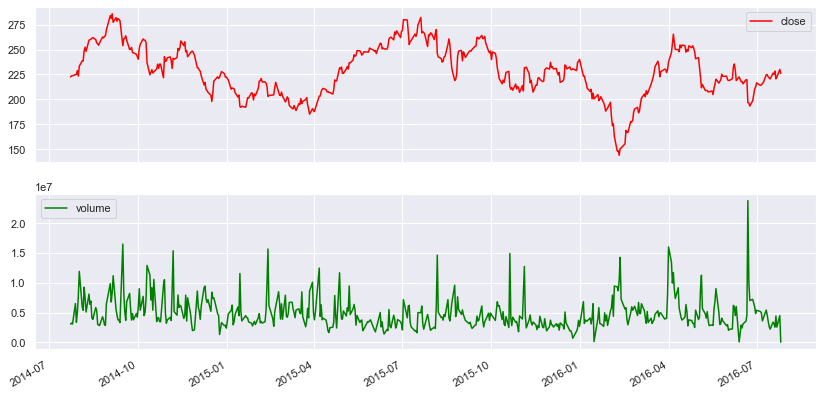

In [17]:
tsla_df[['close', 'volume']].plot(subplots=True, style=['r', 'g'], grid=True);

In [18]:
tsla_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2014-07-23 to 2016-07-26
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   close      504 non-null    float64
 1   high       504 non-null    float64
 2   low        504 non-null    float64
 3   p_change   504 non-null    float64
 4   open       504 non-null    float64
 5   pre_close  504 non-null    float64
 6   volume     504 non-null    int64  
 7   date       504 non-null    int64  
 8   date_week  504 non-null    int64  
 9   key        504 non-null    int64  
 10  atr21      504 non-null    float64
 11  atr14      504 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 51.2 KB


In [19]:
tsla_df.describe()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
count,504.0000,504.0000,504.0000,504.0000,504.0000,504.0000,5.0400e+02,5.0400e+02,504.0000,504.0000,504.0000,504.0000
mean,228.4653,232.1352,224.5626,0.0375,228.4258,228.4587,4.9038e+06,2.0151e+07,2.0159,251.5000,10.2617,10.2592
std,25.4947,25.2726,25.6123,2.6076,25.5300,25.5050,2.6580e+06,6.8708e+03,1.3986,145.6365,1.5960,1.8714
min,143.6700,154.9700,141.0500,-10.4500,142.3200,143.6700,4.1833e+04,2.0141e+07,0.0000,0.0000,6.7806,6.2251
25%,210.3100,214.5175,207.0700,-1.2525,210.7175,210.3100,3.1852e+06,2.0150e+07,1.0000,125.7500,9.1850,9.0220
50%,227.6150,231.8250,223.4300,0.0650,227.8250,227.6150,4.2418e+06,2.0151e+07,2.0000,251.5000,10.0495,10.0609
75%,248.4800,251.9100,245.5575,1.3700,248.8525,248.4800,5.8039e+06,2.0160e+07,3.0000,377.2500,11.4082,11.3879
max,286.0400,291.4200,280.4000,11.1700,287.6700,286.0400,2.3742e+07,2.0161e+07,4.0000,503.0000,14.9311,16.6603


### 4.2.2 索引选取和切片选择

In [20]:
# 2014-07-23至2014-07-31 开盘价格序列
tsla_df.loc['2014-07-23':'2014-07-31', 'open']

2014-07-23    220.01
2014-07-24    223.25
2014-07-25    222.72
2014-07-28    224.25
2014-07-29    226.61
2014-07-30    221.92
2014-07-31    229.26
Name: open, dtype: float64

In [21]:
# 2014-07-23至2014-07-31 所有序列，表4-9所示
tsla_df.loc['2014-07-23':'2014-07-31']

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2014-07-23,222.49,224.75,219.43,1.33,220.01,219.58,3088731,20140723,2,0,8.9775,8.4591
2014-07-24,223.54,225.10,220.80,0.47,223.25,222.49,3248410,20140724,3,1,8.8129,8.2492
2014-07-25,223.57,226.97,221.75,0.01,222.72,223.54,3090383,20140725,4,2,8.6418,8.0328
2014-07-28,224.82,232.00,221.40,0.56,224.25,223.57,6517611,20140728,0,3,8.7351,8.2162
2014-07-29,225.01,228.30,224.86,0.08,226.61,224.82,3387187,20140729,1,4,8.5443,7.9672
2014-07-30,228.92,229.60,221.04,1.74,221.92,225.01,4927823,20140730,2,5,8.5451,8.0095
2014-07-31,223.30,231.40,221.50,-2.45,229.26,228.92,7749058,20140731,3,6,8.6096,8.1445


In [22]:
# [1:5]：(1，2，3，4)，[2:6]: (2, 3, 4, 5)
# 表4-10所示
tsla_df.iloc[1:5, 2:6]

,low,p_change,open,pre_close
2014-07-24,220.80,0.47,223.25,222.49
2014-07-25,221.75,0.01,222.72,223.54
2014-07-28,221.40,0.56,224.25,223.57
2014-07-29,224.86,0.08,226.61,224.82


In [23]:
# 切取所有行[2:6]: (2, 3, 4, 5)列
tsla_df.iloc[:, 2:6]
# 选取所有的列[35:37]:(35, 36)行，表4-11所示
tsla_df.iloc[35:37]

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2014-09-11,280.31,284.79,278.63,-0.28,280.46,281.10,3768584,20140911,3,35,9.1145,9.1254
2014-09-12,279.20,282.39,277.00,-0.40,280.50,280.31,3328302,20140912,4,36,8.9371,8.8586


In [24]:
# 指定一个列
print(tsla_df.close[0:3])
# 通过组成一个列表选择多个列，表4-12所示
tsla_df[['close', 'high', 'low']][0:3]

2014-07-23    222.49
2014-07-24    223.54
2014-07-25    223.57
Name: close, dtype: float64


,close,high,low
2014-07-23,222.49,224.75,219.43
2014-07-24,223.54,225.10,220.80
2014-07-25,223.57,226.97,221.75


### 4.2.3 逻辑条件进行数据筛选

In [25]:
# abs为取绝对值的意思，不是防抱死，表4-13所示
tsla_df[np.abs(tsla_df.p_change) > 8]

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2014-09-15,253.86,274.40,249.13,-9.08,274.370,279.20,16464949,20140915,0,37,9.9963,10.4530
2014-10-28,242.77,244.60,228.25,9.52,229.600,221.67,10516300,20141028,1,68,11.2590,11.4392
2015-08-06,246.13,255.00,236.12,-8.88,249.540,270.13,14623754,20150806,3,261,10.7972,11.5946
2015-08-27,242.99,244.75,230.81,8.07,231.000,224.84,7655959,20150827,3,276,14.3472,15.8950
2015-11-04,231.63,232.74,225.20,11.17,227.000,208.35,12726366,20151104,2,324,11.1504,10.8725
2016-02-08,147.99,157.15,146.00,-8.99,157.105,162.61,9312988,20160208,0,388,12.3292,13.3551
2016-02-17,168.68,169.34,156.68,8.71,159.000,155.17,5825159,20160217,2,394,13.2054,14.2134
2016-06-22,196.66,205.95,195.75,-10.45,199.470,219.61,23742414,20160622,2,481,9.8900,9.8683


In [26]:
tsla_df[(np.abs(tsla_df.p_change) > 8) & (tsla_df.volume > 2.5 * tsla_df.volume.mean())]

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2014-09-15,253.86,274.40,249.13,-9.08,274.37,279.20,16464949,20140915,0,37,9.9963,10.4530
2015-08-06,246.13,255.00,236.12,-8.88,249.54,270.13,14623754,20150806,3,261,10.7972,11.5946
2015-11-04,231.63,232.74,225.20,11.17,227.00,208.35,12726366,20151104,2,324,11.1504,10.8725
2016-06-22,196.66,205.95,195.75,-10.45,199.47,219.61,23742414,20160622,2,481,9.8900,9.8683


### 4.2.4 数据转换与规整

In [27]:
# deprecated sort_index use sort_values
# tsla_df.sort_index(by='p_change')[:5]
tsla_df.sort_values(by='p_change')[:5]

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2016-06-22,196.66,205.95,195.75,-10.45,199.470,219.61,23742414,20160622,2,481,9.8900,9.8683
2014-09-15,253.86,274.40,249.13,-9.08,274.370,279.20,16464949,20140915,0,37,9.9963,10.4530
2016-02-08,147.99,157.15,146.00,-8.99,157.105,162.61,9312988,20160208,0,388,12.3292,13.3551
2015-08-06,246.13,255.00,236.12,-8.88,249.540,270.13,14623754,20150806,3,261,10.7972,11.5946
2014-10-10,236.91,245.89,235.20,-7.82,244.640,257.01,12898280,20141010,4,56,10.8987,11.3338


In [28]:
# deprecated sort_index use sort_values
# tsla_df.sort_index(by='p_change', ascending=False)[:5]
tsla_df.sort_values(by='p_change', ascending=False)[:5]

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2015-11-04,231.63,232.74,225.20,11.17,227.00,208.35,12726366,20151104,2,324,11.1504,10.8725
2014-10-28,242.77,244.60,228.25,9.52,229.60,221.67,10516300,20141028,1,68,11.2590,11.4392
2016-02-17,168.68,169.34,156.68,8.71,159.00,155.17,5825159,20160217,2,394,13.2054,14.2134
2015-08-27,242.99,244.75,230.81,8.07,231.00,224.84,7655959,20150827,3,276,14.3472,15.8950
2016-02-22,177.74,178.91,169.85,6.70,170.12,166.58,5055340,20160222,0,397,13.0337,13.7522


In [29]:
# 如果一行的数据中存在na就删除这行
tsla_df.dropna()            
# 通过how控制 如果一行的数据中全部都是na就删除这行
tsla_df.dropna(how='all')    

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2014-07-23,222.49,224.750,219.43,1.33,220.01,219.58,3088731,20140723,2,0,8.9775,8.4591
2014-07-24,223.54,225.100,220.80,0.47,223.25,222.49,3248410,20140724,3,1,8.8129,8.2492
2014-07-25,223.57,226.970,221.75,0.01,222.72,223.54,3090383,20140725,4,2,8.6418,8.0328
2014-07-28,224.82,232.000,221.40,0.56,224.25,223.57,6517611,20140728,0,3,8.7351,8.2162
2014-07-29,225.01,228.300,224.86,0.08,226.61,224.82,3387187,20140729,1,4,8.5443,7.9672
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-20,228.36,229.800,225.00,1.38,226.47,225.26,2568498,20160720,2,499,9.1923,8.7234
2016-07-21,220.50,227.847,219.10,-3.44,226.00,228.36,4428651,20160721,3,500,9.1711,8.7251
2016-07-22,222.27,224.500,218.88,0.80,221.99,220.50,2579692,20160722,4,501,9.1858,8.7790
2016-07-25,230.01,231.390,221.37,3.48,222.27,222.27,4490683,20160725,0,502,9.2669,8.9298


In [30]:
# 使用指定值填充na， inplace代表就地操作，即不返回新的序列在原始序列上修改
tsla_df.fillna(tsla_df.mean(), inplace=True)

In [31]:
tsla_df.close[:3]

2014-07-23    222.49
2014-07-24    223.54
2014-07-25    223.57
Name: close, dtype: float64

In [32]:
tsla_df.close.pct_change()[:3]

2014-07-23       NaN
2014-07-24    0.0047
2014-07-25    0.0001
Name: close, dtype: float64

In [33]:
(223.54 - 222.49) / 222.49, (223.57 - 223.54) / 223.54

(0.004719313227560713, 0.00013420416927619727)

In [34]:
# pct_change对序列从第二项开始向前做减法在除以前一项，这样的针对close做pct_change后的结果就是涨跌幅
change_ratio = tsla_df.close.pct_change()
change_ratio.tail()

2016-07-20    0.0138
2016-07-21   -0.0344
2016-07-22    0.0080
2016-07-25    0.0348
2016-07-26   -0.0177
Name: close, dtype: float64

In [35]:
# 将change_ratio转变成与tsla_df.p_change字段一样的百分百，同样保留两位小数
np.round(change_ratio[-5:] * 100, 2)

2016-07-20    1.38
2016-07-21   -3.44
2016-07-22    0.80
2016-07-25    3.48
2016-07-26   -1.77
Name: close, dtype: float64

In [36]:
format = lambda x: '%.2f' % x
tsla_df.atr21.map(format).tail()

2016-07-20    9.19
2016-07-21    9.17
2016-07-22    9.19
2016-07-25    9.27
2016-07-26    9.13
Name: atr21, dtype: object

### 4.2.5 数据本地序列化操作

In [37]:
tsla_df.to_csv('../gen/tsla_df.csv', columns=tsla_df.columns, index=True)

In [38]:
tsla_df_load = pd.read_csv('../gen/tsla_df.csv', parse_dates=True, index_col=0)
tsla_df_load.head()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2014-07-23,222.49,224.75,219.43,1.33,220.01,219.58,3088731,20140723,2,0,8.9775,8.4591
2014-07-24,223.54,225.10,220.80,0.47,223.25,222.49,3248410,20140724,3,1,8.8129,8.2492
2014-07-25,223.57,226.97,221.75,0.01,222.72,223.54,3090383,20140725,4,2,8.6418,8.0328
2014-07-28,224.82,232.00,221.40,0.56,224.25,223.57,6517611,20140728,0,3,8.7351,8.2162
2014-07-29,225.01,228.30,224.86,0.08,226.61,224.82,3387187,20140729,1,4,8.5443,7.9672


## 4.3 实例1：寻找股票异动涨跌幅阀值

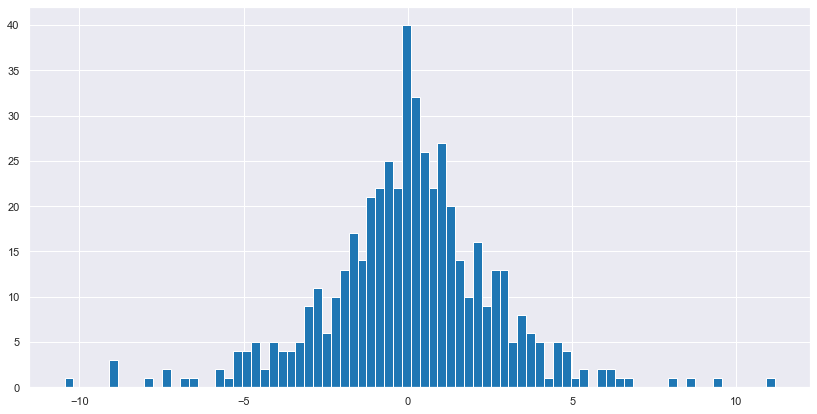

In [39]:
tsla_df.p_change.hist(bins=80);

### 4.3.1 数据的离散化

In [40]:
cats = pd.qcut(np.abs(tsla_df.p_change), 10)
cats.value_counts()

(4.221, 11.17]                   51
(2.324, 3.01]                    51
(1.764, 2.324]                   51
(0.72, 1.04]                     51
(0.436, 0.72]                    51
(0.009000000000000001, 0.192]    51
(1.34, 1.764]                    50
(0.192, 0.436]                   50
(3.01, 4.221]                    49
(1.04, 1.34]                     49
Name: p_change, dtype: int64

In [41]:
# 将涨跌幅数据手工分类，从负无穷到－7，－5，－3，0， 3， 5， 7，正无穷
bins = [-np.inf, -7.0, -5, -3, 0, 3, 5, 7, np.inf]
cats = pd.cut(tsla_df.p_change, bins)
cats.value_counts()

(0.0, 3.0]      209
(-3.0, 0.0]     193
(3.0, 5.0]       38
(-5.0, -3.0]     35
(5.0, 7.0]        9
(-7.0, -5.0]      9
(-inf, -7.0]      7
(7.0, inf]        4
Name: p_change, dtype: int64

In [42]:
# cr_dummies为列名称前缀
change_ration_dummies = pd.get_dummies(cats, prefix='cr_dummies')
change_ration_dummies.head()

,"cr_dummies_(-inf, -7.0]","cr_dummies_(-7.0, -5.0]","cr_dummies_(-5.0, -3.0]","cr_dummies_(-3.0, 0.0]","cr_dummies_(0.0, 3.0]","cr_dummies_(3.0, 5.0]","cr_dummies_(5.0, 7.0]","cr_dummies_(7.0, inf]"
2014-07-23,0,0,0,0,1,0,0,0
2014-07-24,0,0,0,0,1,0,0,0
2014-07-25,0,0,0,0,1,0,0,0
2014-07-28,0,0,0,0,1,0,0,0
2014-07-29,0,0,0,0,1,0,0,0


### 4.3.2 concat, append, merge的使用

In [43]:
pd.concat([tsla_df, change_ration_dummies], axis=1).tail()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14,"cr_dummies_(-inf, -7.0]","cr_dummies_(-7.0, -5.0]","cr_dummies_(-5.0, -3.0]","cr_dummies_(-3.0, 0.0]","cr_dummies_(0.0, 3.0]","cr_dummies_(3.0, 5.0]","cr_dummies_(5.0, 7.0]","cr_dummies_(7.0, inf]"
2016-07-20,228.36,229.800,225.00,1.38,226.47,225.26,2568498,20160720,2,499,9.1923,8.7234,0,0,0,0,1,0,0,0
2016-07-21,220.50,227.847,219.10,-3.44,226.00,228.36,4428651,20160721,3,500,9.1711,8.7251,0,0,1,0,0,0,0,0
2016-07-22,222.27,224.500,218.88,0.80,221.99,220.50,2579692,20160722,4,501,9.1858,8.7790,0,0,0,0,1,0,0,0
2016-07-25,230.01,231.390,221.37,3.48,222.27,222.27,4490683,20160725,0,502,9.2669,8.9298,0,0,0,0,0,1,0,0
2016-07-26,225.93,228.740,225.63,-1.77,227.34,230.01,41833,20160726,1,503,9.1337,8.7541,0,0,0,1,0,0,0,0


In [44]:
# pd.concat的连接axis＝0：纵向连接atr>14的df和p_change > 10的df
pd.concat([tsla_df[tsla_df.p_change > 10],
           tsla_df[tsla_df.atr14 > 16]], axis=0)

# 直接使用DataFrame对象append，结果与上面pd.concat的结果一致, 表4-20所示
tsla_df[tsla_df.p_change > 10].append(
    tsla_df[tsla_df.atr14 > 16])

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2015-11-04,231.63,232.74,225.20,11.17,227.00,208.35,12726366,20151104,2,324,11.1504,10.8725
2015-08-28,248.48,251.45,241.57,2.26,241.86,242.99,5513673,20150828,4,277,14.9311,16.6603
2015-08-31,249.06,254.95,245.51,0.23,245.62,248.48,4700232,20150831,0,278,14.7897,16.3246


In [45]:
stock_a = pd.DataFrame({'stock_a': ['a', 'b', 'c', 'd', 'a'],
                 'data': list(range(5))})

stock_b = pd.DataFrame({'stock_b': ['a', 'b', 'c'],
                 'data2': list(range(3))})
pd.merge(stock_a, stock_b, left_on='stock_a', right_on='stock_b')

,stock_a,data,stock_b,data2
0,a,0,a,0
1,a,4,a,0
2,b,1,b,1
3,c,2,c,2


## 4.4 实例2 ：星期几是这个股票的‘好日子’

In [46]:
tsla_df['positive'] = np.where(tsla_df.p_change > 0, 1, 0)
tsla_df.tail()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14,positive
2016-07-20,228.36,229.800,225.00,1.38,226.47,225.26,2568498,20160720,2,499,9.1923,8.7234,1
2016-07-21,220.50,227.847,219.10,-3.44,226.00,228.36,4428651,20160721,3,500,9.1711,8.7251,0
2016-07-22,222.27,224.500,218.88,0.80,221.99,220.50,2579692,20160722,4,501,9.1858,8.7790,1
2016-07-25,230.01,231.390,221.37,3.48,222.27,222.27,4490683,20160725,0,502,9.2669,8.9298,1
2016-07-26,225.93,228.740,225.63,-1.77,227.34,230.01,41833,20160726,1,503,9.1337,8.7541,0


### 4.4.1  构建交叉表

In [47]:
xt = pd.crosstab(tsla_df.date_week, tsla_df.positive)
xt 

positive,0,1
date_week,,
0,44,51
1,55,48
2,48,57
3,44,57
4,53,47


In [48]:
xt_pct = xt.div(xt.sum(1).astype(float), axis=0)
xt_pct

positive,0,1
date_week,,
0,0.4632,0.5368
1,0.5340,0.4660
2,0.4571,0.5429
3,0.4356,0.5644
4,0.5300,0.4700


Text(0, 0.5, 'positive')

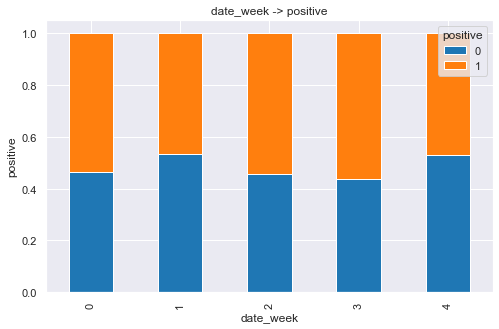

In [49]:
xt_pct.plot(
    figsize=(8, 5),
    kind='bar',
    stacked=True,
    title='date_week -> positive')
plt.xlabel('date_week')
plt.ylabel('positive')

### 4.4.2  构建透视表

In [50]:
tsla_df.pivot_table(['positive'], index=['date_week'])

,positive
date_week,
0,0.5368
1,0.4660
2,0.5429
3,0.5644
4,0.4700


In [51]:
tsla_df.groupby(['date_week', 'positive'])['positive'].count()

date_week  positive
0          0           44
           1           51
1          0           55
           1           48
2          0           48
           1           57
3          0           44
           1           57
4          0           53
           1           47
Name: positive, dtype: int64

## 4.5 实例3 ：跳空缺口

In [52]:
jump_threshold = tsla_df.close.median() * 0.03
jump_threshold

6.82845

In [53]:
jump_pd = pd.DataFrame()

def judge_jump(p_today):
    global jump_pd
    if p_today.p_change > 0 and (p_today.low - p_today.pre_close) > jump_threshold:
        """
            符合向上跳空
        """
        # jump记录方向 1向上
        p_today['jump'] = 1
        # 向上跳能量＝（今天最低 － 昨收）／ 跳空阀值
        p_today['jump_power'] = (p_today.low - p_today.pre_close) / jump_threshold
        jump_pd = jump_pd.append(p_today)
    elif p_today.p_change < 0 and (p_today.pre_close - p_today.high) > jump_threshold:
        """
            符合向下跳空
        """
        # jump记录方向 －1向下
        p_today['jump'] = -1
        # 向下跳能量＝（昨收 － 今天最高）／ 跳空阀值
        p_today['jump_power'] = (p_today.pre_close - p_today.high) / jump_threshold
        jump_pd = jump_pd.append(p_today)

for kl_index in np.arange(0, tsla_df.shape[0]):
    # 通过iloc一个一个拿
    today = tsla_df.iloc[kl_index]
    judge_jump(today)

# filter按照顺序只显示这些列, 表4-26所示
jump_pd.filter(['jump', 'jump_power', 'close', 'date', 'p_change', 'pre_close'])

,jump,jump_power,close,date,p_change,pre_close
2014-08-11,1.0,1.0061,259.32,2.0141e+07,4.51,248.13
2014-10-10,-1.0,1.6285,236.91,2.0141e+07,-7.82,257.01
2015-01-14,-1.0,1.3253,192.69,2.0150e+07,-5.66,204.25
2015-02-12,-1.0,1.4223,202.88,2.0150e+07,-4.66,212.80
2015-07-08,-1.0,1.0368,254.96,2.0151e+07,-4.82,267.88
2015-07-21,-1.0,1.2829,266.77,2.0151e+07,-5.49,282.26
2015-08-06,-1.0,2.2157,246.13,2.0151e+07,-8.88,270.13
2015-08-17,1.0,1.0778,254.99,2.0151e+07,4.87,243.15
2015-11-04,1.0,2.4676,231.63,2.0151e+07,11.17,208.35
2016-01-04,-1.0,1.2638,223.41,2.0160e+07,-6.92,240.01


In [54]:
jump_pd = pd.DataFrame()
# axis=1即行数据，tsla_df的每一条行数据即为每一个交易日数据
tsla_df.apply(judge_jump, axis=1)
jump_pd

,atr14,atr21,close,date,date_week,high,jump,jump_power,key,low,open,p_change,positive,pre_close,volume
2014-08-11,9.7572,9.6455,259.32,2.0141e+07,0.0,263.740,1.0,1.0061,13.0,255.00,255.48,4.51,1.0,248.13,8.1013e+06
2014-10-10,11.3338,10.8987,236.91,2.0141e+07,4.0,245.890,-1.0,1.6285,56.0,235.20,244.64,-7.82,0.0,257.01,1.2898e+07
2015-01-14,9.4215,9.5509,192.69,2.0150e+07,2.0,195.200,-1.0,1.3253,121.0,185.00,185.83,-5.66,0.0,204.25,1.1552e+07
2015-02-12,9.9740,9.7817,202.88,2.0150e+07,3.0,203.088,-1.0,1.4223,141.0,193.28,193.57,-4.66,0.0,212.80,1.5650e+07
2015-07-08,10.0575,9.2084,254.96,2.0151e+07,2.0,260.800,-1.0,1.0368,241.0,254.31,259.32,-4.82,0.0,267.88,6.2211e+06
2015-07-21,9.9827,9.4003,266.77,2.0151e+07,1.0,273.500,-1.0,1.2829,249.0,266.55,270.05,-5.49,0.0,282.26,6.1087e+06
2015-08-06,11.5946,10.7972,246.13,2.0151e+07,3.0,255.000,-1.0,2.2157,261.0,236.12,249.54,-8.88,0.0,270.13,1.4624e+07
2015-08-17,11.9753,11.3456,254.99,2.0151e+07,0.0,256.590,1.0,1.0778,268.0,250.51,255.56,4.87,1.0,243.15,7.1767e+06
2015-11-04,10.8725,11.1504,231.63,2.0151e+07,2.0,232.740,1.0,2.4676,324.0,225.20,227.00,11.17,1.0,208.35,1.2726e+07
2016-01-04,9.4124,9.5672,223.41,2.0160e+07,0.0,231.380,-1.0,1.2638,364.0,219.00,230.72,-6.92,0.0,240.01,6.8271e+06


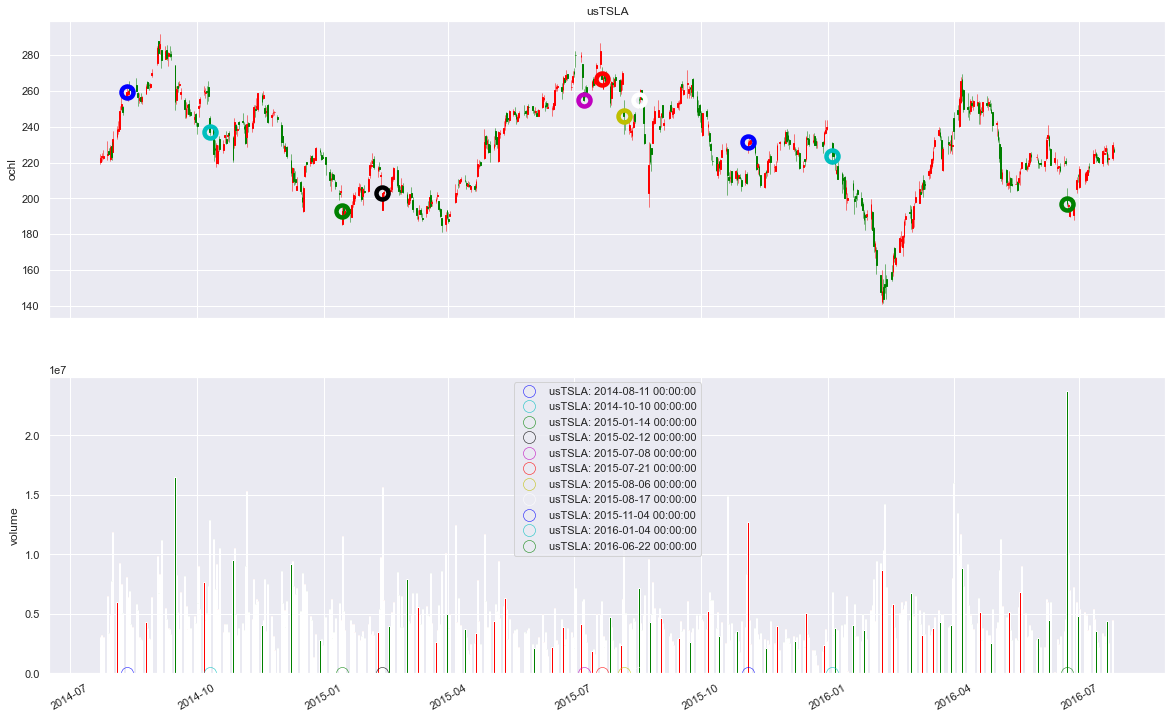

In [55]:
from abupy import ABuMarketDrawing
# view_indexs传入jump_pd.index，即在k图上使用圆来标示跳空点
ABuMarketDrawing.plot_candle_form_klpd(tsla_df, view_indexs=jump_pd.index)

## 4.6 pandas三维面板的使用

In [56]:
# disable_example_env_ipython不再使用沙盒数据，因为沙盒里面没有相关tsla行业的数据啊
abupy.env.disable_example_env_ipython()

disable example env


In [57]:
abupy.env.g_data_fetch_mode = abupy.env.EMarketDataFetchMode.E_DATA_FETCH_FORCE_NET

In [58]:
from abupy import ABuIndustries
r_symbol = 'usTSLA'
# 这里获取了和TSLA电动车处于同一行业的股票组成pandas三维面板Panel数据
p_date, _ = ABuIndustries.get_industries_panel_from_target(r_symbol, show=False)

('Connection aborted.', ConnectionResetError(10054, '远程主机强迫关闭了一个现有的连接。', None, 10054, None))
Traceback (most recent call last):
  File "D:\0ilraypan\python_work\env\abu\lib\site-packages\urllib3\connectionpool.py", line 706, in urlopen
    chunked=chunked,
  File "D:\0ilraypan\python_work\env\abu\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "D:\0ilraypan\python_work\env\abu\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "D:\0ilraypan\python_work\env\abu\lib\http\client.py", line 1379, in getresponse
    response.begin()
  File "D:\0ilraypan\python_work\env\abu\lib\http\client.py", line 311, in begin
    version, status, reason = self._read_status()
  File "D:\0ilraypan\python_work\env\abu\lib\http\client.py", line 272, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "D:\0ilr

ValueError: CapitalClass init benchmark kl_pd is None

In [ ]:
type(p_date)

In [ ]:
p_date

In [ ]:
p_date['usTTM'].head()

In [ ]:
p_data_it = p_date.swapaxes('items', 'minor')
p_data_it

In [ ]:
p_data_it_close = p_data_it['close'].dropna(axis=0)
p_data_it_close.tail()

In [ ]:
from abupy import ABuScalerUtil
# ABuScalerUtil.scaler_std将所有close的切面数据做(group - group.mean()) / group.std()标示化，为了可视化在同一范围
p_data_it_close = ABuScalerUtil.scaler_std(p_data_it_close)
p_data_it_close.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Price')
plt.xlabel('Time')